# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


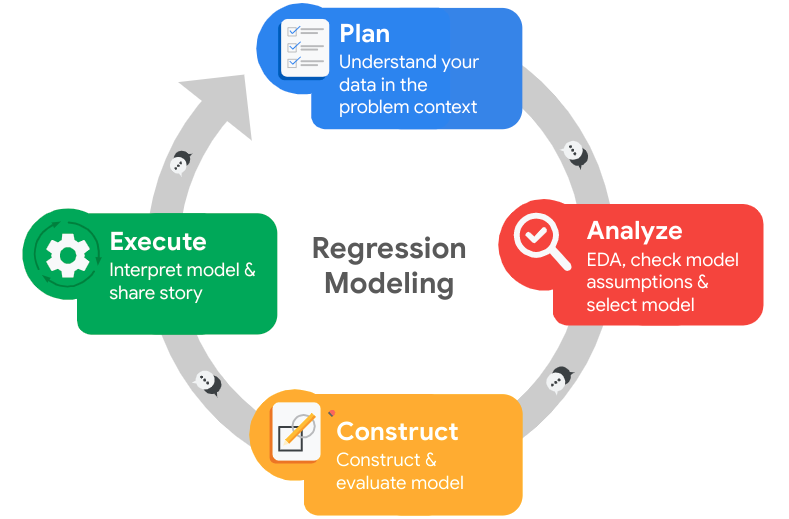

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.


- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- Do you have any ethical considerations in this stage?




* Determining key factors that affect empoyees turnover, building model that can predict whether employee is lekely to quit.
* There are around 12000 unique entries. There are no missing values in the data. There are 10 columns in the dataset.
* There isn't any kind of personal or sensitive information in the provided dataset. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
import pandas as pd
import numpy as np

import sklearn.metrics as metrics
import pickle

import matplotlib.pyplot as plt
import seaborn as sns


# imports for construct
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV, train_test_split


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

### Gather descriptive statistics about the data

In [6]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#Creating plotting function
def histogram(df, column, size=(8,5)):
    plt.figure(figsize=size)
    plt.title(f'Distribution for {column}')
    sns.histplot(data=df, x=column)

    median= df[column].median()
    plt.axvline(x=median, color='red', alpha=.5, ls='--')
    plt.show()

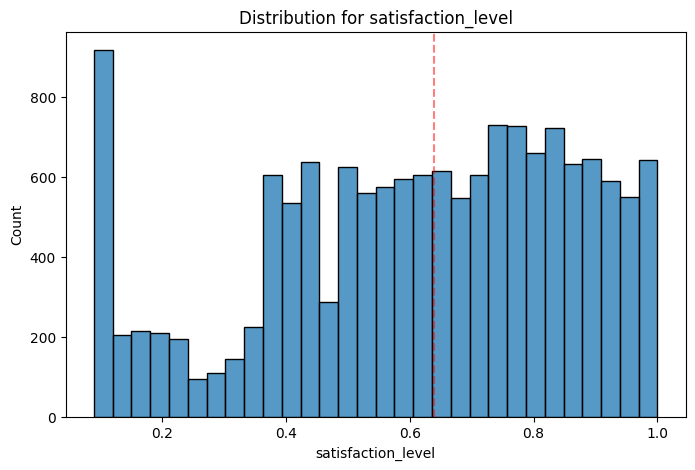

In [8]:
histogram(df0, 'satisfaction_level')

Left skewed satisfaction distribution with more then 900 workers who rated satisfaction close to zero. 
Investigating it below.


In [9]:
# Creating mask to filter out 0-0.05 satisfaction reviews.
mask = (df0['satisfaction_level'] >= -0.1) & (df0['satisfaction_level']<=0.2)

#filtering out

low_review_df = df0[mask]
low_review_df['left'].value_counts(normalize=True)

left
1    0.625169
0    0.374831
Name: proportion, dtype: float64

<Axes: xlabel='satisfaction_level', ylabel='Count'>

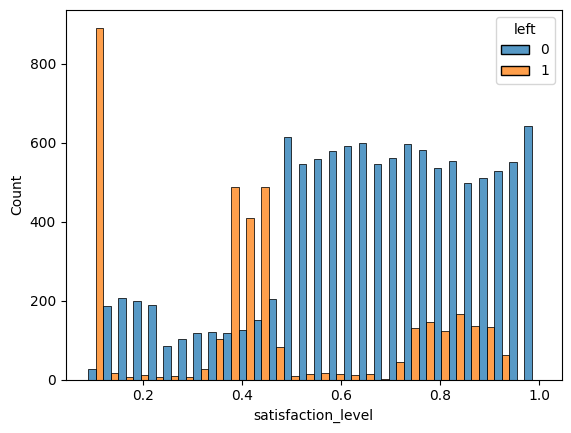

In [10]:
sns.histplot(data=df0, x='satisfaction_level', hue='left', multiple='dodge')

<Axes: xlabel='satisfaction_level', ylabel='Count'>

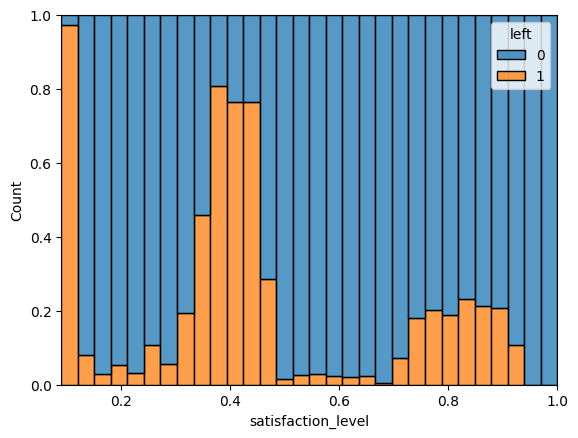

In [11]:
# proportion of stayed/left plot
sns.histplot(data=df0, x='satisfaction_level', hue='left', multiple='fill')

62.5% of users who rated their satisfaction in the range 0-0.2, left the company.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [12]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
# Rename columns as needed
names = {'Work_accident':'work_accident', 'Department':'department', 'average_montly_hours': 'average_monthly_hours', 'time_spend_company':'tenure'
    }

# Display all column names after the update
df0.rename(names, axis='columns', inplace=True)
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [14]:
df0.isna().any(axis='index').sum()

0

There are no missing value in the dataset.

### Check duplicates

Check for any duplicate entries in the data.

In [15]:
# Check for duplicates
df0.duplicated().sum()


3008

In [16]:
# Inspect some rows containing duplicates as needed
mask_d = df0.duplicated(keep=False)
df0[mask_d]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Considering several continuous variables in this dataset, it's highly unlikely any two duplicates are legitemate entries, as there is no way to check(like employee ID).
It's better to continues working on EDA after droping duplicates.

In [17]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: ylabel='average_monthly_hours'>

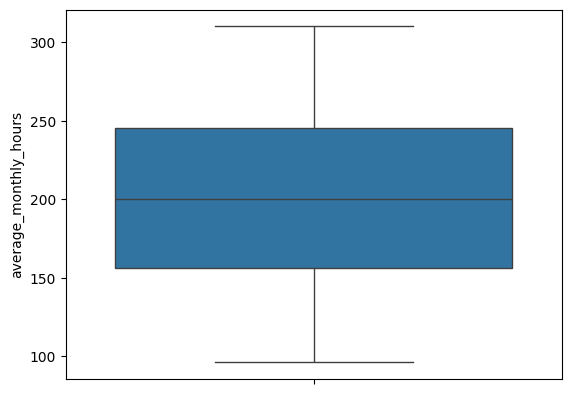

In [18]:
sns.boxplot(data=df0, y='average_monthly_hours')

<Axes: ylabel='tenure'>

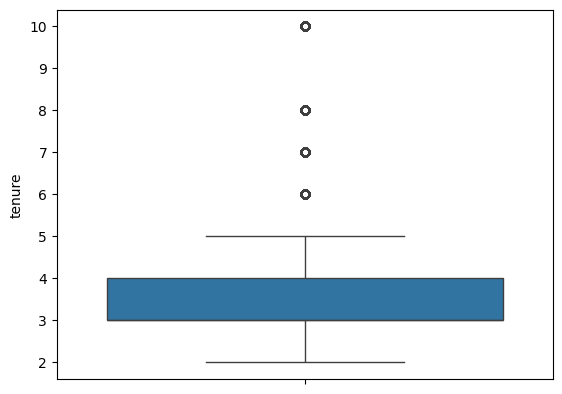

In [19]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df0, y='tenure')



In [20]:
# Determine the number of rows containing outliers

p75, p25 = df['tenure'].quantile(.75), df['tenure'].quantile(.25)

iqr = p75 - p25
# as plot shown there are no oulites below the 25th percentile only one limit is used.
limit = p75 + iqr * 1.5
print('Worked for', limit, 'years of more')
df[df['tenure']>=limit].shape

Worked for 5.5 years of more


(824, 10)

There are 824 entries containing outliers in the tenure column. No outliers in monthly hours. Other columns are non suitable for having ouliers, considering previously obtained descriptive statistics.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What are some purposes of EDA before constructing a predictive model?
- Do you have any ethical considerations in this stage?




There are no extreme correlations. 
* Whether employee leaves has negative correlation with satisfaction
* Number of project has a positive correlation with average working hours per month.

Distributions:
* Satisfaction distribution is left-skewed with a lot of extreme values on the left end.
* Last evaluation distribution is close to uniform, except 0.4-0.5 range
* Around 92% of the workers have either low or medium salary(47.8% and 43.9% respectively). Around 8% per high salary.
* Most employees have 3-4 concurrent projects
* Most employees work for the company for 2-4 years.


Some purposes of EDA:
* Cleaning the dataset.
* Uncovering hidden stories in data.
* Checking if there is enough data in order to build a model.



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [21]:
# Get numbers of people who left vs. stayed
[df['left'].value_counts(), df['left'].value_counts(normalize=True)]

[left
 0    10000
 1     1991
 Name: count, dtype: int64,
 left
 0    0.833959
 1    0.166041
 Name: proportion, dtype: float64]

After removing duplicate entries there are 10000 of survey result from people who stayed in the company, and 1991 from thoose who left.

83.3% - 16.7%
This indicates presence of class imbalance in the dataset, people who left being the minority class. However, disbalance is not extreme, si there may not be nessesicity of (up/down)scaling. It's still important to stratify while spliting for holdout and valiadtion data.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

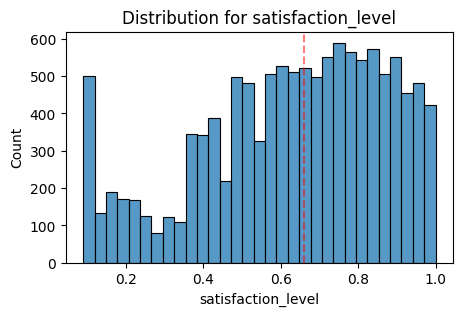

In [23]:
histogram(df, 'satisfaction_level', (5,3))

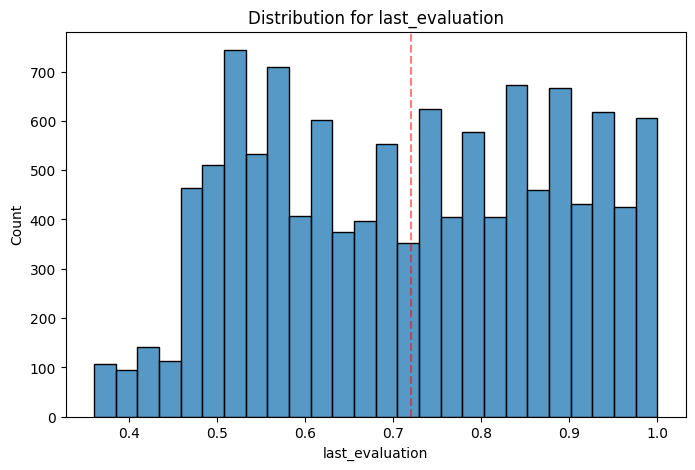

In [24]:
histogram(df, 'last_evaluation')

Text(0.5, 1.0, 'Evaluation distribution histogram')

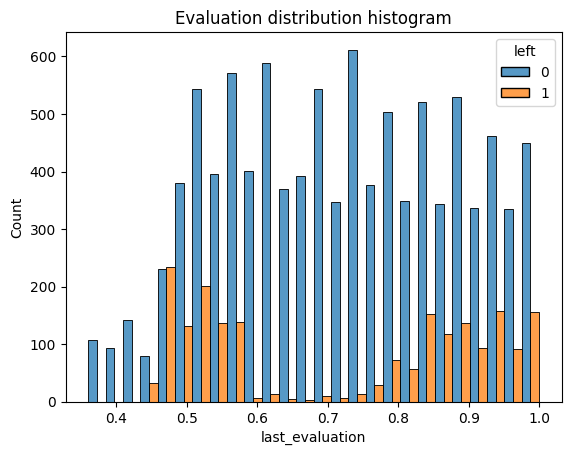

In [25]:
sns.histplot(df, x='last_evaluation', hue='left', multiple='dodge')
plt.title('Evaluation distribution histogram')

Text(0.5, 1.0, 'Turnover rate by evaluation score')

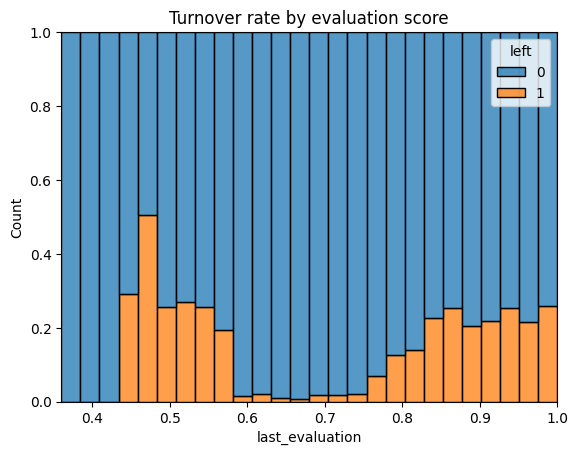

In [26]:
sns.histplot(df, x='last_evaluation', hue='left', multiple='fill')
plt.title('Turnover rate by evaluation score')

Most people who leave the company are either performing below average(0.71), or better then average.

In [27]:
[df['salary'].value_counts(normalize=True),
 df.groupby('salary')['left'].value_counts(), 
 df.groupby('salary')['left'].value_counts(normalize=True)]


[salary
 low       0.478692
 medium    0.438746
 high      0.082562
 Name: proportion, dtype: float64,
 salary  left
 high    0        942
         1         48
 low     0       4566
         1       1174
 medium  0       4492
         1        769
 Name: count, dtype: int64,
 salary  left
 high    0       0.951515
         1       0.048485
 low     0       0.795470
         1       0.204530
 medium  0       0.853830
         1       0.146170
 Name: proportion, dtype: float64]

Around 92% of the workers have either low or medium salary(47.8% and 43.9% respectively). 

Employees within high salary category have turnover rate of 4.8%. 14.6% for medium salary and 20.4% for low salary.

Text(0.5, 1.0, 'Turnover rate by salary')

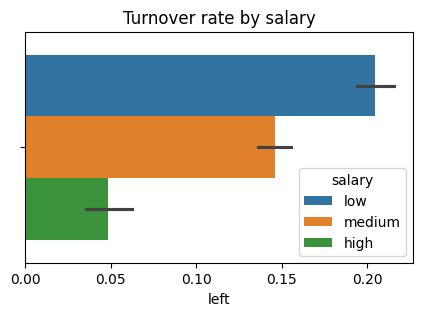

In [28]:
plt.figure(figsize=(5,3))
sns.barplot(df, x='left', hue='salary')
plt.title('Turnover rate by salary')

Text(0.5, 1.0, 'Turnover rate by salary')

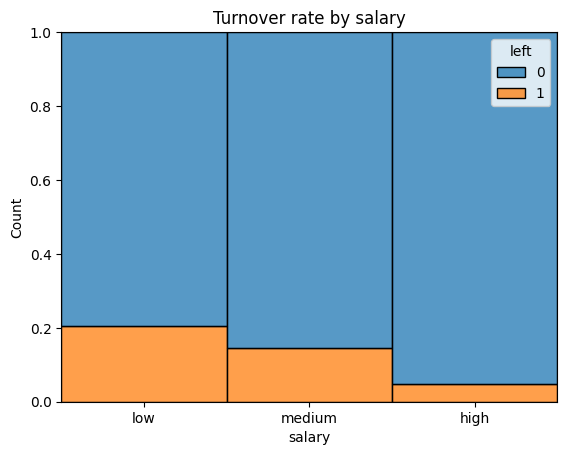

In [29]:
sns.histplot(df, x='salary', hue='left', multiple='fill')
plt.title('Turnover rate by salary')

Text(0.5, 1.0, 'Salary distribution histogram')

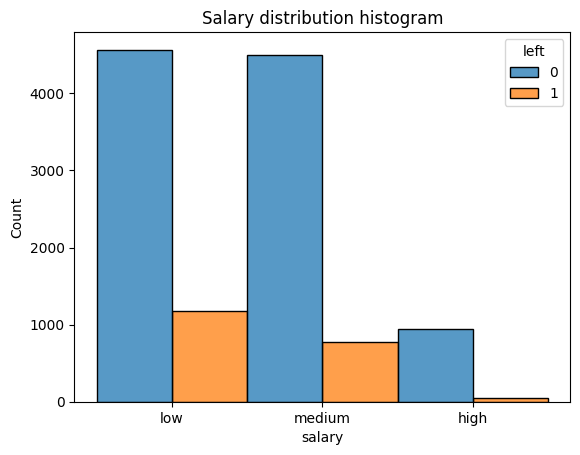

In [30]:
sns.histplot(df, x='salary', hue='left', multiple='dodge')
plt.title('Salary distribution histogram')

Text(0.5, 1.0, 'Tenure distribution histogram')

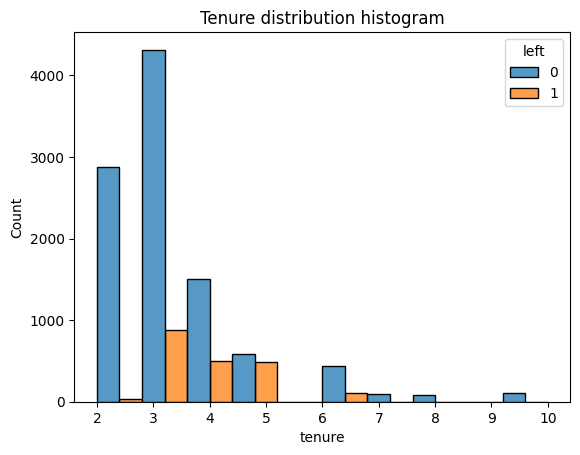

In [31]:
sns.histplot(df, x='tenure', hue='left', multiple='dodge', bins=10)
plt.title('Tenure distribution histogram')

In [32]:
tenure = df.groupby('tenure')
tenure['left'].value_counts(normalize=True)

tenure  left
2       0       0.989347
        1       0.010653
3       0       0.831599
        1       0.168401
4       0       0.753117
        1       0.246883
5       0       0.546139
        1       0.453861
6       0       0.798893
        1       0.201107
7       0       1.000000
8       0       1.000000
10      0       1.000000
Name: proportion, dtype: float64

Turnover rate increases from 3rd year to 5th. People who stayed within company for 7 and more years are unlikely to quit.
There is an extreme turnover rate jump between 2nd and 3rd year.

In [33]:
tenure['salary'].value_counts(normalize=True)

tenure  salary
2       low       0.472165
        medium    0.439175
        high      0.088660
3       low       0.485356
        medium    0.433911
        high      0.080732
4       low       0.491771
        medium    0.433416
        high      0.074813
5       low       0.517891
        medium    0.428437
        high      0.053672
6       medium    0.481550
        low       0.433579
        high      0.084871
7       medium    0.606383
        high      0.202128
        low       0.191489
8       medium    0.518519
        low       0.370370
        high      0.111111
10      medium    0.439252
        high      0.299065
        low       0.261682
Name: proportion, dtype: float64

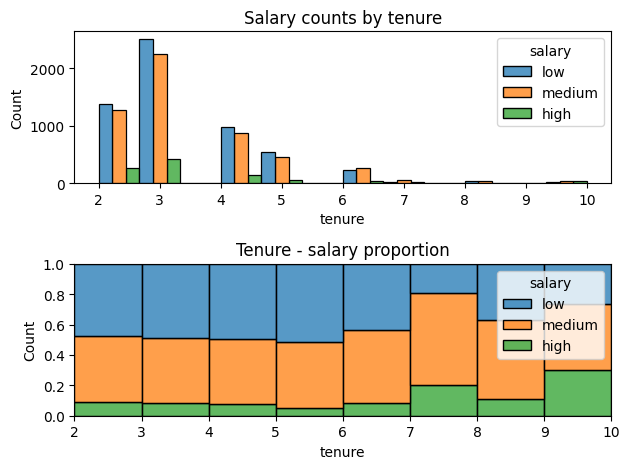

In [34]:
fig, axs = plt.subplots(2, 1)
sns.histplot(data=df, x='tenure', hue='salary', multiple='dodge', bins=12, ax=axs[0])
axs[0].set_title("Salary counts by tenure")



sns.histplot(data=df, x='tenure', hue='salary', multiple='fill',  ax=axs[1], bins=8)
axs[1].set_title("Tenure - salary proportion")


plt.tight_layout()
plt.show()
#sns.histplot(data=df, x='tenure', hue='salary', multiple='dodge', bins=15)

One hypothesis derived from this visualisation can be people increasingly quit during the 3rd-5th year span is because there is no change in the salary proportion. Which might go against their expectations.

In [35]:
df['promotion_last_5years'].value_counts()


promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [36]:
df.groupby('promotion_last_5years')['left'].value_counts(normalize=True)

promotion_last_5years  left
0                      0       0.831778
                       1       0.168222
1                      0       0.960591
                       1       0.039409
Name: proportion, dtype: float64

Employees who recived a promotion in the span of last 5 years are 4 times less likely to leave the company.

In [37]:
[df.groupby('department')['left'].value_counts(normalize=True), df.groupby('department')['left'].value_counts()]

[department   left
 IT           0       0.838115
              1       0.161885
 RandD        0       0.877522
              1       0.122478
 accounting   0       0.824477
              1       0.175523
 hr           0       0.811980
              1       0.188020
 management   0       0.880734
              1       0.119266
 marketing    0       0.833581
              1       0.166419
 product_mng  0       0.839650
              1       0.160350
 sales        0       0.830195
              1       0.169805
 support      0       0.828666
              1       0.171334
 technical    0       0.826203
              1       0.173797
 Name: proportion, dtype: float64,
 department   left
 IT           0        818
              1        158
 RandD        0        609
              1         85
 accounting   0        512
              1        109
 hr           0        488
              1        113
 management   0        384
              1         52
 marketing    0        561
          

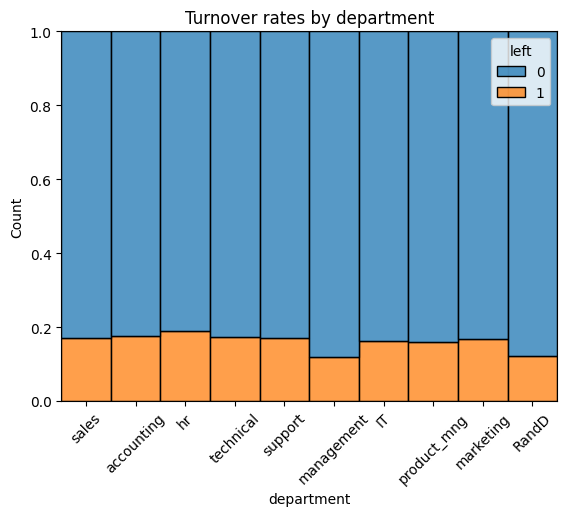

In [38]:
sns.histplot(df, x='department', hue='left', multiple='fill')
plt.xticks(rotation=45)
plt.title('Turnover rates by department')
plt.show() 

Turnover rate is the lowest in RandD and managment departments 12.2% and 11.9% respectivly. Highest turnover rate is in HR department 18.8%. For other departments turnover rate is in the range 16-17.5.

work_accident
0    10141
1     1850
Name: count, dtype: int64


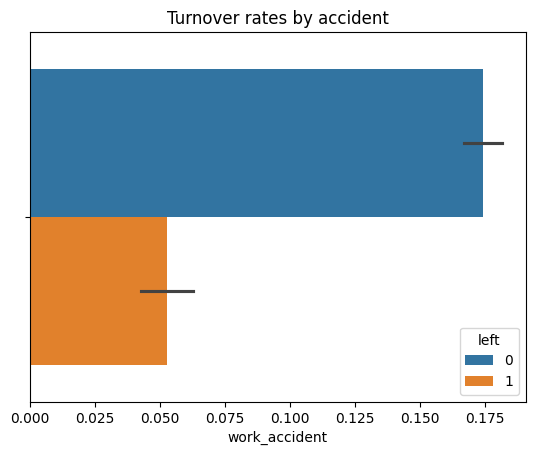

In [39]:
print(df['work_accident'].value_counts())
sns.barplot(df, x='work_accident', hue='left')
plt.title('Turnover rates by accident')
plt.show()

In [40]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Median hours worked for each project number:
number_project
2    151.0
3    196.0
4    205.0
5    217.0
6    247.0
7    281.0
Name: average_monthly_hours, dtype: float64
Overall median: 200.0


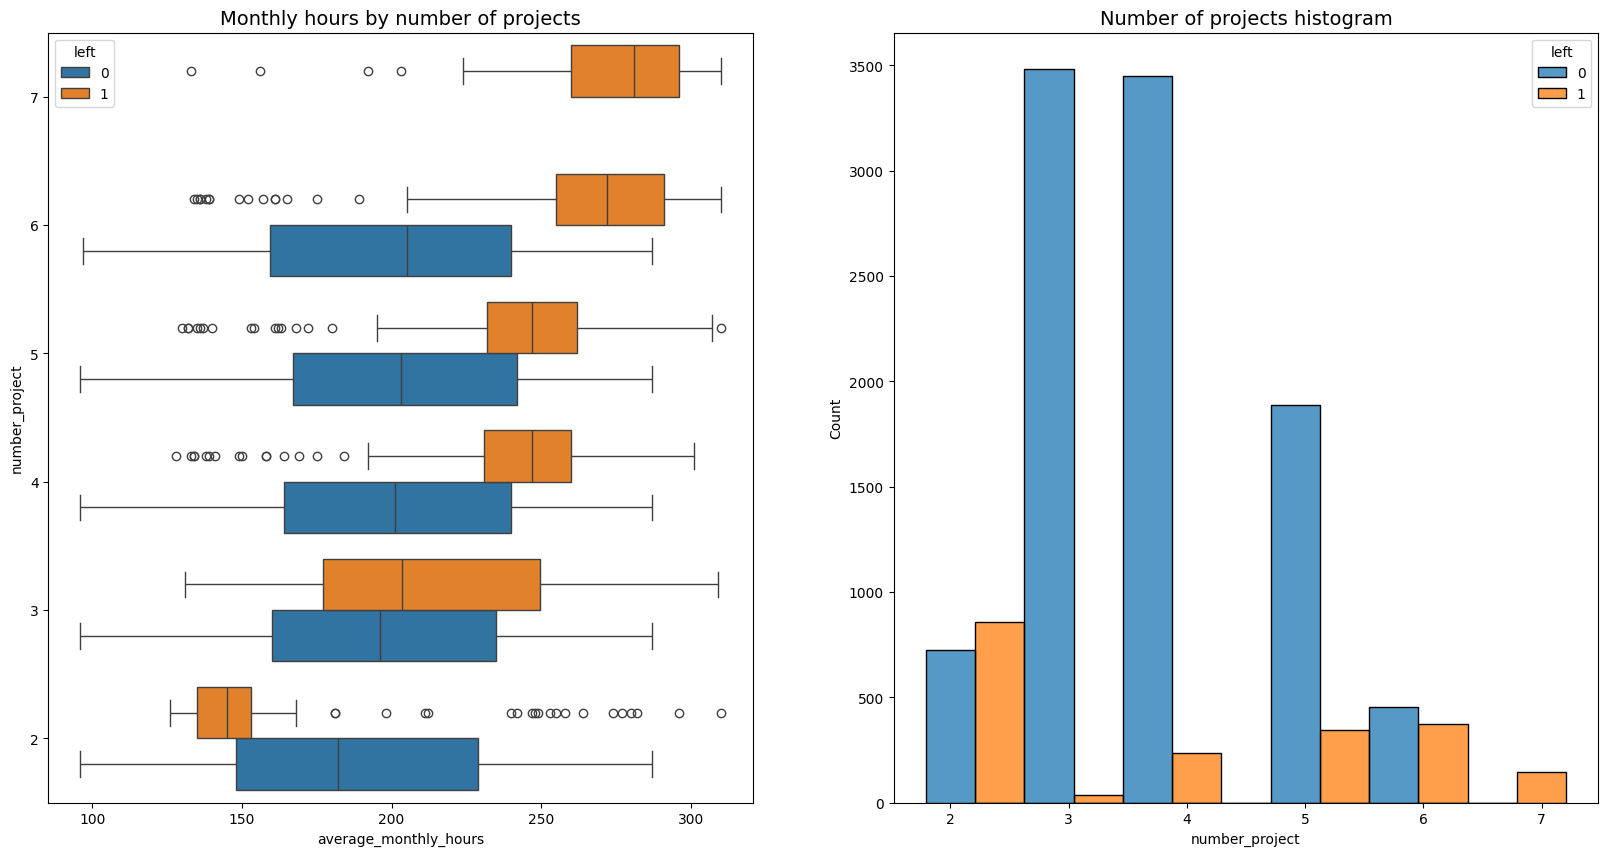

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))


sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1], bins=12)
ax[1].set_title('Number of projects histogram', fontsize='14')

print('Median hours worked for each project number:', df.groupby('number_project')['average_monthly_hours'].median(), sep='\n')
print('Overall median:', df['average_monthly_hours'].median())
#plt.tight_layout()
plt.show()

From boxplot above, people who leave can be put in two groups, first group worked less then median for corresponding project number, in this case they probably were fired. Another group worked more monthly hours, which probably indicates that they left on their own initiative, every employee who had 7 concurrent project left.

Employees who work or 3-4 project seem to leave the least.

48


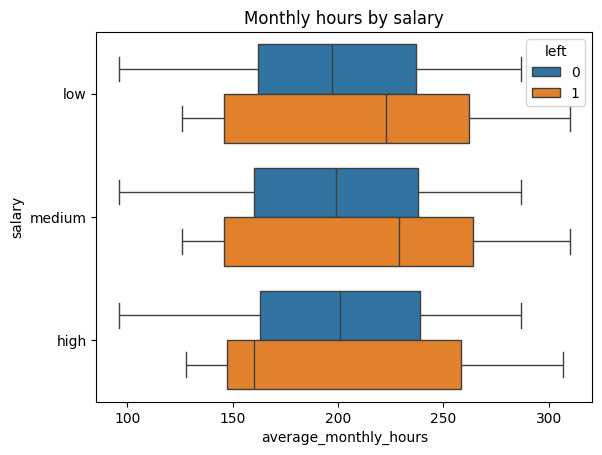

In [42]:
sns.boxplot(df, x='average_monthly_hours', y='salary', hue='left')
print(df[(df['salary']=='high') & (df['left']==1)]['left'].count())
plt.title('Monthly hours by salary')
plt.show(
)

People who left, on average worked more hours no matter the salary. There might be some firing in high salary employees who worked little hours. However this group is small. As only 48 people with high salary left.

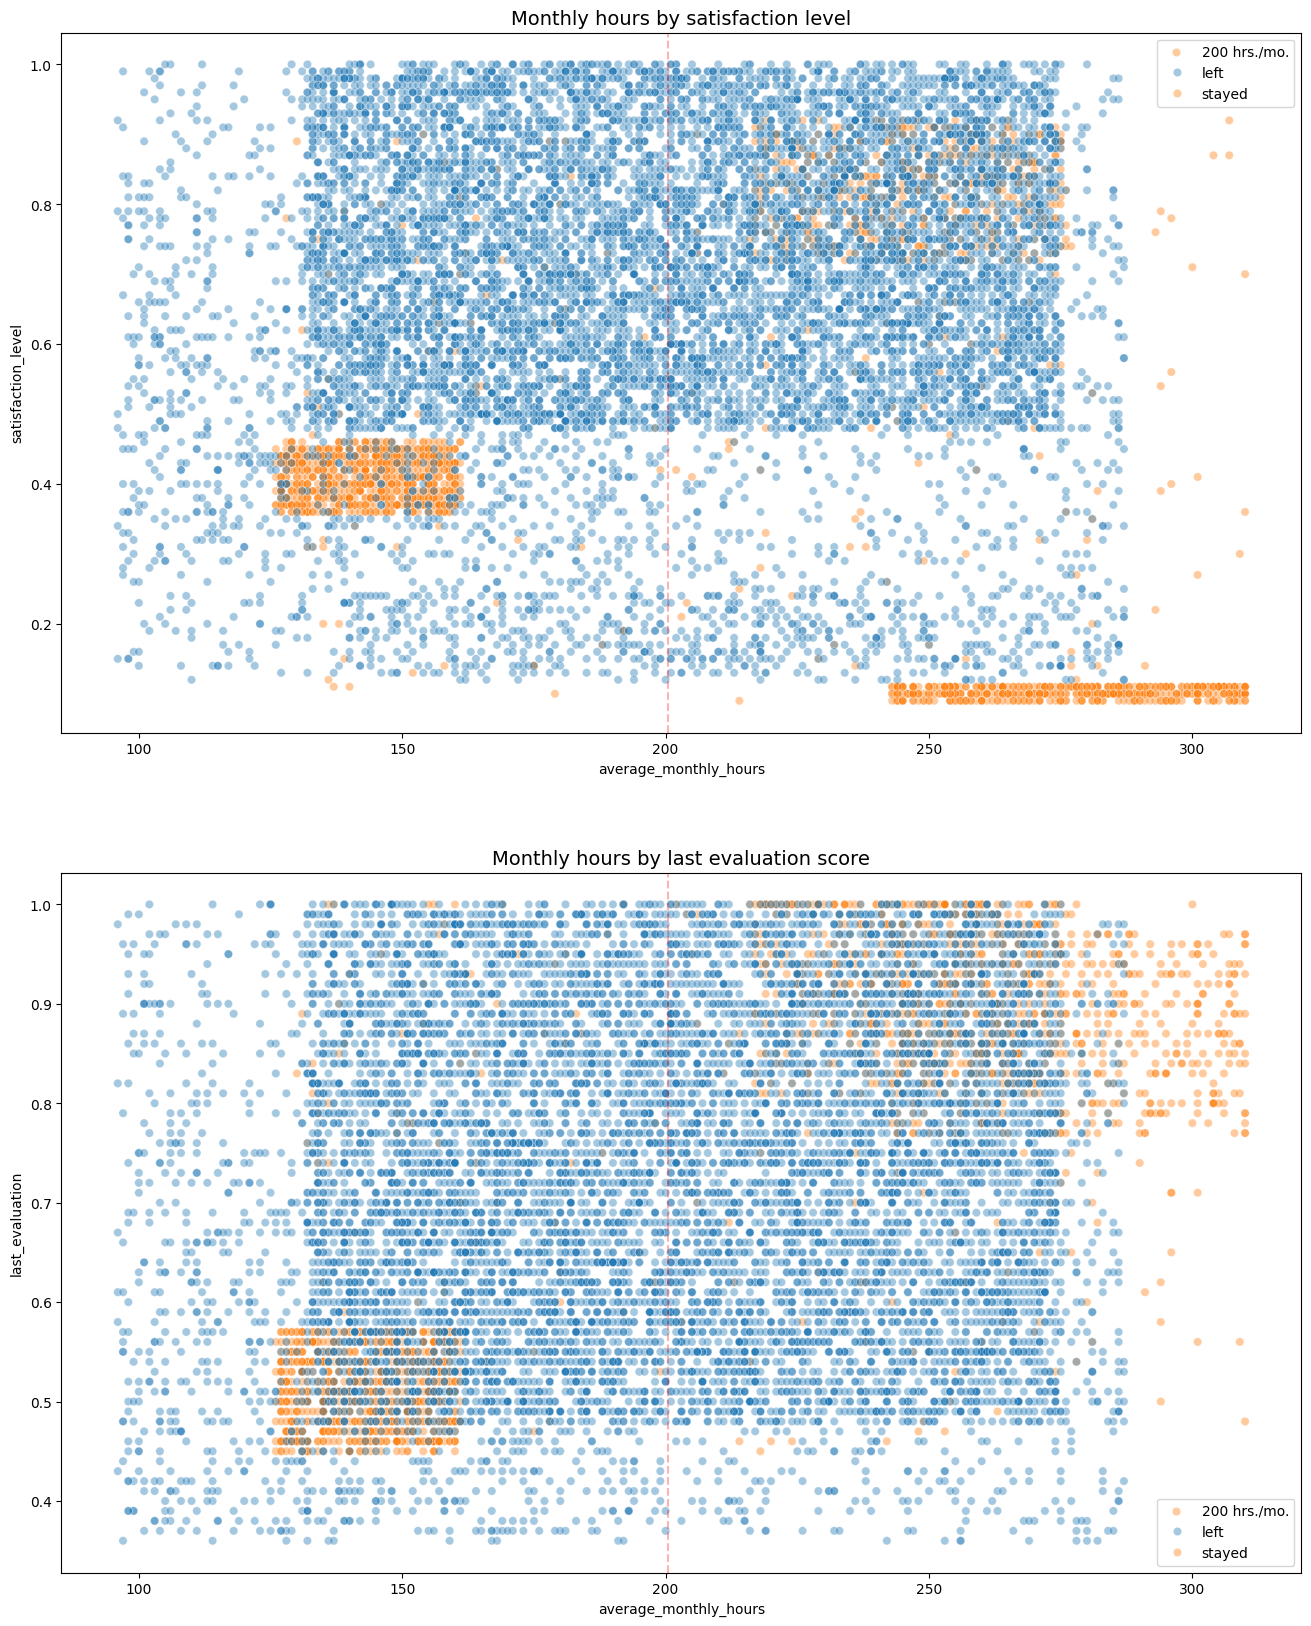

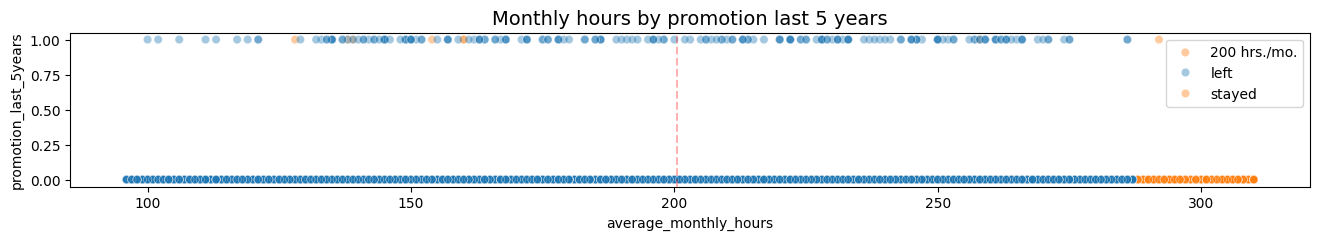

In [43]:
mean = df['average_monthly_hours'].mean()
fig, ax = plt.subplots(2, 1, figsize = (16,20))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4, ax=ax[0])
ax[0].axvline(x=mean, color='red', label=f'{round(mean)} hrs./mo.', ls='--', alpha=.3)
ax[0].legend(labels=[f'{round(mean)} hrs./mo.', 'left', 'stayed'])
ax[0].set_title('Monthly hours by satisfaction level', fontsize='14');

sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4, ax=ax[1])
ax[1].axvline(x=mean, color='red', label=f'{round(mean)} hrs./mo.', ls='--', alpha=.3)
ax[1].legend(labels=[f'{round(mean)} hrs./mo.', 'left', 'stayed'])
ax[1].set_title('Monthly hours by last evaluation score', fontsize='14');

plt.show()
plt.figure(figsize=(16,2))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=mean, color='red', ls='--', alpha=.3)
plt.legend(labels=[f'{round(mean)} hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');
plt.show()

In realtion of working hours and perfomance evaluation there are two groups of employees who left. One is located in the lower left quater, these are people who worked the least and performed poorly. Another group is located in the upper-right quater, these employees who worked the most and had close to perfect performance. 

When it's probably the case that first group was fired. It makes no sense to fire the best performers, therefore likely these people quit on their own. There is also corresponding in the right lower quarter of satisfaction to monthly hours scatterplot that reinforces this take.
Only a few employees who worked more then 275 hours/month were promoted.

This may indicate poor managment.

In [44]:
df['satisfaction_by_hours'] = (df['satisfaction_level']/df['average_monthly_hours'])*100
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14732\477572406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['satisfaction_by_hours'] = (df['satisfaction_level']/df['average_monthly_hours'])*100


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,satisfaction_by_hours
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.242038
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.305344
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.040441
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.322870
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.232704


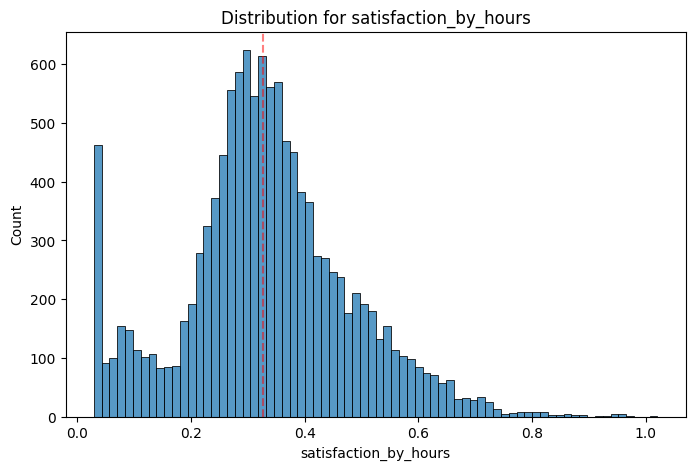

In [45]:
histogram(df, 'satisfaction_by_hours')

<Axes: xlabel='satisfaction_by_hours', ylabel='Count'>

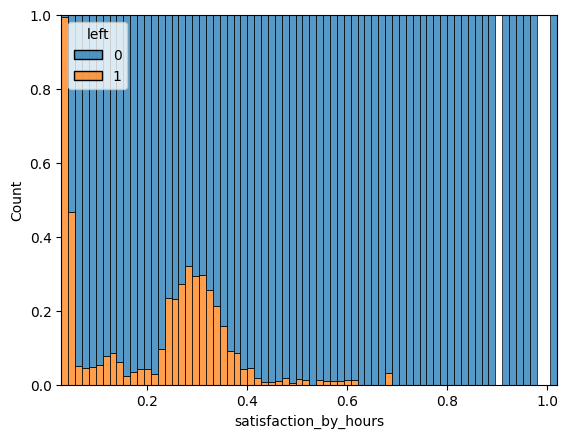

In [46]:
sns.histplot(df, x='satisfaction_by_hours', hue='left', multiple='fill')

This feature is not useful

In [47]:
df.drop('satisfaction_by_hours', axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14732\1650468810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('satisfaction_by_hours', axis=1, inplace=True)


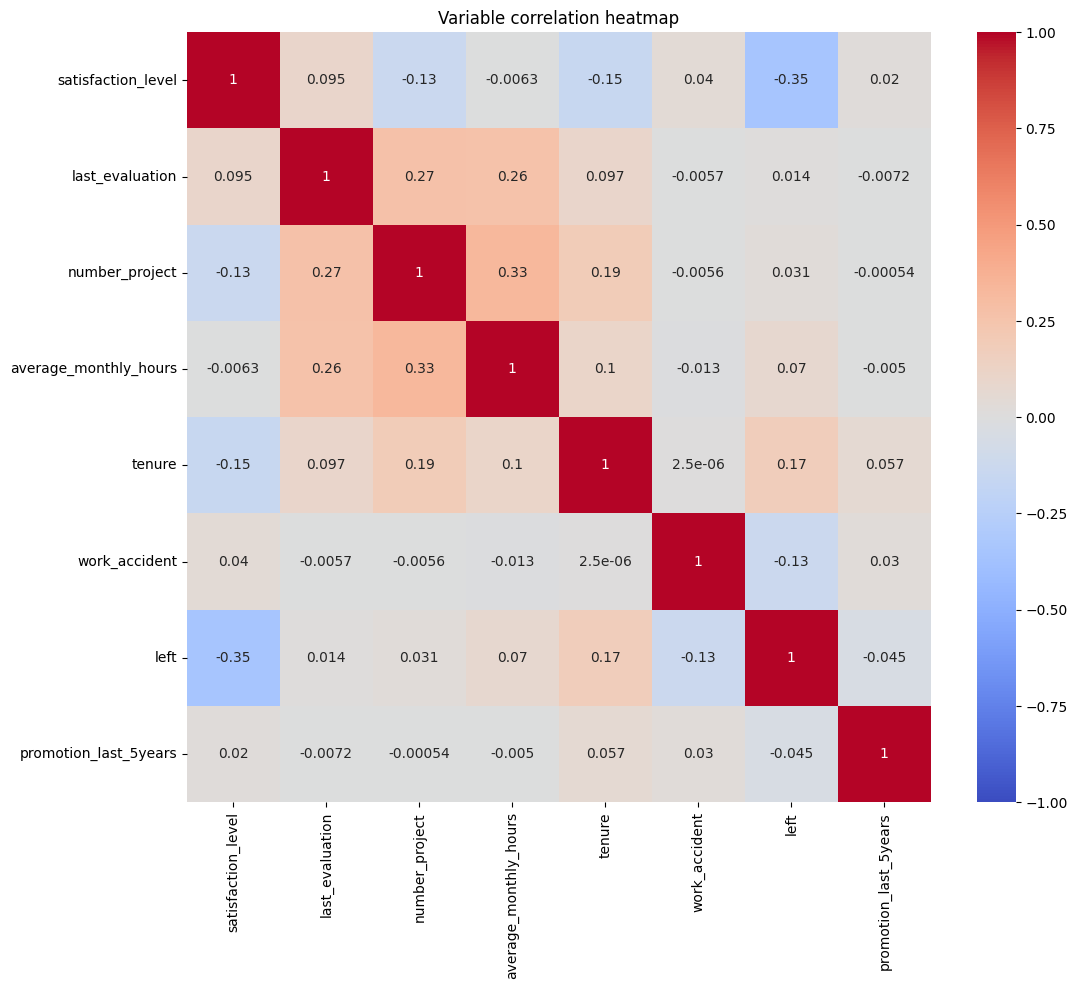

In [48]:
# Checking for correlation between variables.
cont_df = df.drop(['salary', 'department'], axis=1)
plt.figure(figsize=(12,10))
plt.title('Variable correlation heatmap')
sns.heatmap(cont_df.corr(method='pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

There are no extreme correlations. 

* Whether employee leaves has negative correlation with satisfaction
* Number of project has a positive correlation with average working hours per month.


### Insights

* Employees within low salary category are most likely to quit.
* Majority of turnovers are from employees who stated to had satisfation of 0.5 or less.
* Most people who leave the company are either performing below average(0.71), or better then average.
* Turnover rate increases from 3rd year to 5th. People who stayed within company for 7 and more years are unlikely to quit.
There is an extreme turnover rate jump between 2nd and 3rd year.
* Employees who recived a promotion in the span of last 5 years are 4 times less likely to leave the company.
* Employees from marketing department are least likely to leave. On the other side people who work in HR department are most likely to.
* Employees who experienced a work accident are 3 times less likely to leave.
* Optimal amount of project per employee is in the range 3-4 projects.
* Whether employee leaves has negative correlation with satisfaction.

Employees who leave on their own, tend to do so because of poor managment, their work is unrewarded and there are no salary raises for around 5 years, promotions among people who work the most is extremely uncommon in given dataset.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is binary prediction. In case of regression model it has t ge logistic regression. If it's machine learning model classifieris needed.

### Modeling

Add as many cells as you need to conduct the modeling process.

In order to check what value affect whether employee leaves the most, decision tree classifier is going to be build as it can be clearly interprented.

For the purposes of more presice prediction XGBoost and Random Forests classifers are going to build and efficiency of these three model is going to be compared in order to choose the best predictior.

There are no assumptions needed for the tree based models to work and they are robust to outliers, so dataset does not need to be modified.

#### Decision tree model

For this model all variables are left in the data.

In [49]:
# encoding categorical variables

df_model = pd.get_dummies(df, columns=['department'])
df_model['salary'] = (
    df_model['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [50]:
# separating target variable
y = df_model['left']
X=df_model.copy()
X.drop('left', axis=1, inplace=True)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


### Data splitting

For each model grid search will be performed using cross validation procedure, then each champion model will be tested using test data. As there are only 12,000 rows in the dataset, there won't be seperate validation set.

Data is going to be split with stratification as there is class imbalance.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.25)

### Grid search parameters and scoring metrics

In [52]:
# set of hyperparamters for gridsearch
dt_params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 25, 50, None],
    'min_samples_split':[2, 5, 10, .05]
}

scoring = ['f1', 'recall', 'precision', 'accuracy']

# creating  a classifier object
tree_cls = DecisionTreeClassifier(random_state=0)

For key metric f1 is chosen as it's equally important for model to be precise and to recall as much employees who are about to leave as possible.

In [53]:
decision_tree_gs = GridSearchCV(estimator=tree_cls, param_grid=dt_params, scoring=scoring, n_jobs=-1, verbose=2, cv=5,  refit='f1')

In [54]:
#decision_tree_gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 25, 50, None],
                         'min_samples_split': [2, 5, 10, 0.05]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'],
             verbose=2)

In [55]:
decision_tree_gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}

In [56]:
decision_tree_gs.best_score_

0.9430833612275838

In [57]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                        })
  
    return table

In [58]:
# Outputting the table with the best params.
make_results('Decision Tree model',decision_tree_gs,'f1' )

,model,precision,recall,F1,accuracy
0,Decision Tree model,0.971587,0.916267,0.943083,0.981652


Champion trained model performs well during cross validation. With F1 score of 94.3%.

There is n need to retrain champion model on all training data as GridSearch does this automatically.

### Random Forest

In [59]:
# gs hyperparameters

rf_params = {
    'n_estimators': [50, 100, 150, 250],
    'max_depth': [3, 5, 8, 15],
    'min_samples_split':[2, 5, 0.01, 0.05],
    'max_features':['sqrt', 2, 5],
    'max_samples':[.3, 1.0]
}

rf_cls = RandomForestClassifier(random_state=0)

In [60]:
random_forest_gs = GridSearchCV(estimator=rf_cls, param_grid=rf_params, scoring=scoring, n_jobs=-1, verbose=2, cv=5,  refit='f1')

In [80]:
#random_forest_gs.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 15],
                         'max_features': ['sqrt', 2, 5],
                         'max_samples': [0.3, 1.0],
                         'min_samples_split': [2, 5, 0.01, 0.05],
                         'n_estimators': [50, 100, 150, 250]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'],
             verbose=2)

In [ ]:
random_forest_gs.best_params_

{'max_depth': 15,
 'max_features': 5,
 'max_samples': 1.0,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
make_results('Random Forest model', random_forest_gs, 'f1')

,model,precision,recall,F1,accuracy
0,Random Forest model,0.988453,0.914927,0.950237,0.984098


Random forest is slightly more precise then tree based model. And has F1 score of 95%

In [ ]:
pickle.dump(random_forest_gs, open('random_forest_cv.sav', 'wb'))

### XGBoost

In [62]:
xgb_params = {
    'n_estimators': [100, 150, 250],
    'max_depth': [3, 5, 8, 15, None],
    'min_child_weight':[1, 5, 0.01, 0.02],
    'learning_rate':[0.02, 0.05, 0.1, 0.2, 0.3],
    'colsample_bytree':[0.4, 1.0],
    'subsample':[0.3, 1.0]
}

xgb_cls = XGBClassifier(random_state=0)

In [63]:
XGBoost_gs = GridSearchCV(estimator=xgb_cls, param_grid=xgb_params, scoring=scoring, n_jobs=-1, verbose=2, cv=5,  refit='f1')

In [64]:
#XGBoost_gs.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 1.0],
                         'learning_rate': [0.02, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 8, 15, None],
                         'min_child_weight': [1, 5, 0.01, 0.02],
                         'n_estimators': [100, 150, 250],
                         'subsample': [0.3, 1.0]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'],
             verbose=2)

In [65]:
#saving the model
pickle.dump(XGBoost_gs, open('gradient_boost_cv.sav', 'wb'))

In [66]:
XGBoost_gs.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 0.01,
 'n_estimators': 100,
 'subsample': 1.0}

In [67]:
make_results('Gradient Boosting model', XGBoost_gs, 'f1')

,model,precision,recall,F1,accuracy
0,Gradient Boosting model,0.981465,0.920285,0.949864,0.983876


Accuracy close to one obtained from random forest model.

## Training models with feature engineering.

The working hours per month variable can be affected, in case when employees get a leave notice, they might start to put in less hours.
However during EDA average hours column turned out to be influential, so instead of removing, it's going to be replaced by binary variable that considers whether amount of hours employee worked is above 70th percentile.

In [68]:
df_model.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [79]:
df_fe = df_model.copy()
p70 = df_fe['average_monthly_hours'].quantile(.70)
print(p70)
df_fe['long_hours'] = np.where(df_fe['average_monthly_hours'] >= p70, 1, 0)
df_fe.drop('average_monthly_hours', inplace=True, axis=1)
df_fe.head()

235.0


,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,long_hours
0,0.38,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.80,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.11,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.72,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
4,0.37,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [81]:
y_2 = df_fe['left']
X_2 = df_fe.copy()
X_2.drop('left', axis=1, inplace=True)

In [82]:
X_2train, X_2test, y_2train, y_2test = train_test_split(X_2, y_2, random_state=42, stratify=y, test_size=.25)

In [83]:
decision_tree_gs_fe = GridSearchCV(estimator=tree_cls, param_grid=dt_params, scoring=scoring, n_jobs=-1, verbose=2, cv=5,  refit='f1')

In [84]:
#decision_tree_gs_fe.fit(X_2train, y_2train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 25, 50, None],
                         'min_samples_split': [2, 5, 10, 0.05]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'],
             verbose=2)

In [86]:
decision_tree_gs_fe.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

In [85]:
make_results('Decision Tree model with feature engineering', decision_tree_gs_fe, 'f1')

,model,precision,recall,F1,accuracy
0,Decision Tree model with feature engineering,0.960139,0.910907,0.934723,0.978873


This model performs slighlty worse then previously trained decision tree model.

In [87]:
random_forest_gs_fe = GridSearchCV(estimator=rf_cls, param_grid=rf_params, scoring=scoring, n_jobs=-1, verbose=2, cv=5,  refit='f1')

In [88]:
#random_forest_gs_fe.fit(X_2train, y_2train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 15],
                         'max_features': ['sqrt', 2, 5],
                         'max_samples': [0.3, 1.0],
                         'min_samples_split': [2, 5, 0.01, 0.05],
                         'n_estimators': [50, 100, 150, 250]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'],
             verbose=2)

In [90]:
random_forest_gs_fe.best_params_

{'max_depth': 15,
 'max_features': 5,
 'max_samples': 1.0,
 'min_samples_split': 2,
 'n_estimators': 50}

In [91]:
make_results('Random Forest model with feature engineering', random_forest_gs_fe, 'f1')

,model,precision,recall,F1,accuracy
0,Random Forest model with feature engineering,0.970488,0.902873,0.935426,0.979317


Performs worse then the random forest model trained on data with   `average_hours_monthly` column.

In [89]:
pickle.dump(random_forest_gs_fe, open('random_forest_fe_cv.sav', 'wb'))

In [92]:
XGBoost_gs_fe = GridSearchCV(estimator=xgb_cls, param_grid=xgb_params, scoring=scoring, n_jobs=-1, verbose=2, cv=5,  refit='f1')

In [93]:
#XGBoost_gs_fe.fit(X_2train, y_2train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 1.0],
                         'learning_rate': [0.02, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 8, 15, None],
                         'min_child_weight': [1, 5, 0.01, 0.02],
                         'n_estimators': [100, 150, 250],
                         'subsample': [0.3, 1.0]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'],
             verbose=2)

In [95]:
XGBoost_gs_fe.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.02,
 'max_depth': 8,
 'min_child_weight': 0.01,
 'n_estimators': 100,
 'subsample': 1.0}

In [96]:
make_results('Gradient Boost model with feature engineering', XGBoost_gs_fe, 'f1')

,model,precision,recall,F1,accuracy
0,Gradient Boost model with feature engineering,0.973501,0.909567,0.940405,0.980874


In [97]:
pickle.dump(XGBoost_gs_fe, open('XGBoost_fe_cv.sav', 'wb'))

All three models performed better with `average_hours_monthly` column in place in further evalutation set of that model is going to be used.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Feature importance

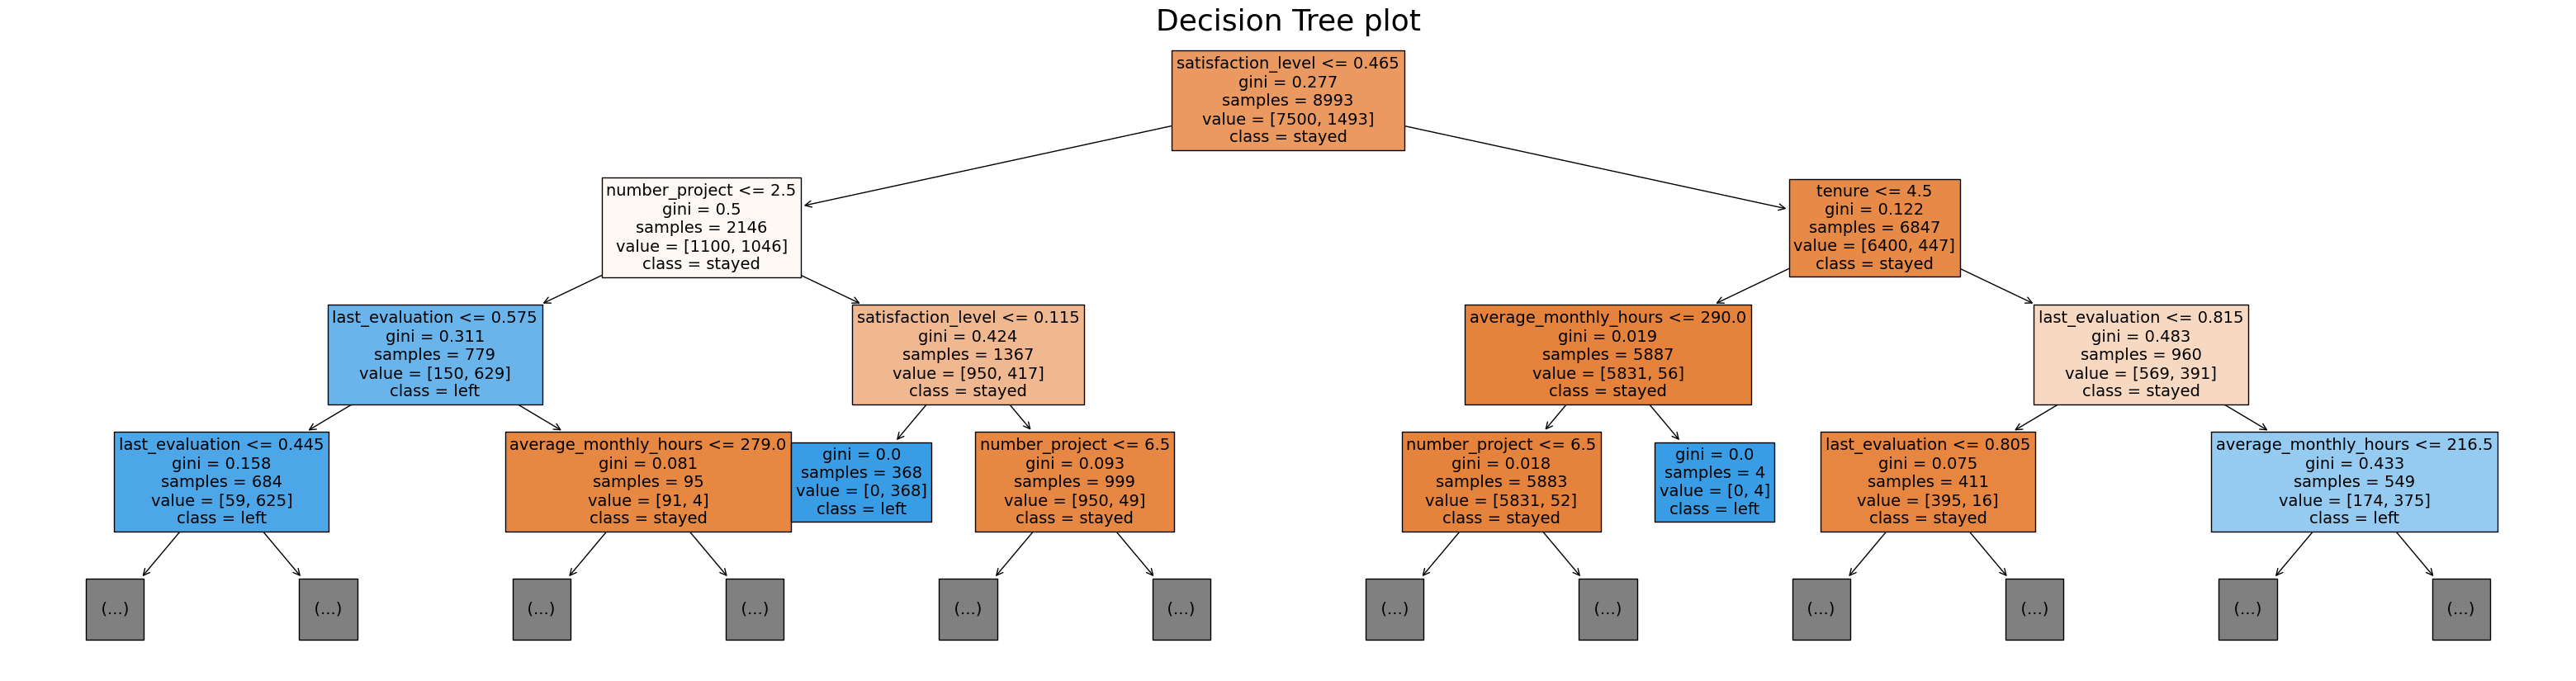

In [115]:
plt.figure(figsize=(40,10))
plot_tree(max_depth=3, decision_tree=decision_tree_gs.best_estimator_, fontsize=14, 
          class_names={0:'stayed', 1:'left'}, feature_names=X.columns, filled=True)
plt.title('Decision Tree plot', size='26')
plt.show()

In [126]:
dt_importance = pd.DataFrame(decision_tree_gs.best_estimator_.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
dt_importance.head(10)

,0
satisfaction_level,0.491958
last_evaluation,0.168791
number_project,0.132021
tenure,0.122601
average_monthly_hours,0.081763
department_marketing,0.001011
department_IT,0.000627
department_sales,0.000466
salary,0.000336
department_technical,0.000274


For the decision tree model the most important features are `satisfaction_level`, `last_evaluation`, `number_project` and `tenure`. 
Note that decision tree feature importance are the most interprentable one as decision trees are transparent model, whereas Random Forest and XGBoost are not.

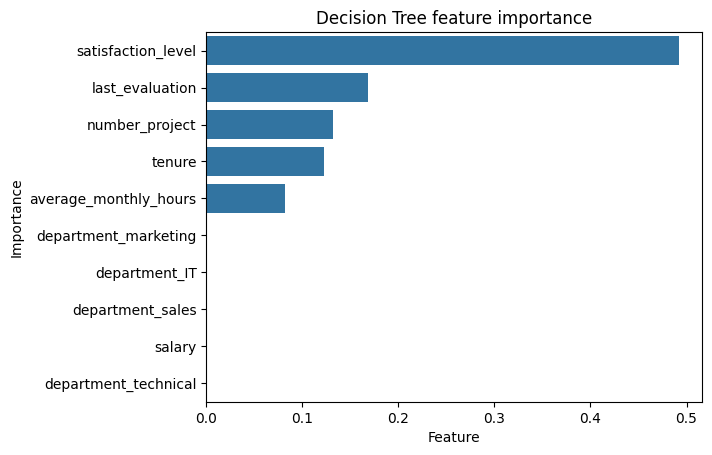

In [138]:
sns.barplot(data=dt_importance.head(10), x=dt_importance.columns[0], y=dt_importance.index[:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree feature importance')
plt.show() 

In [100]:
xgb_trained = XGBoost_gs.best_estimator_

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

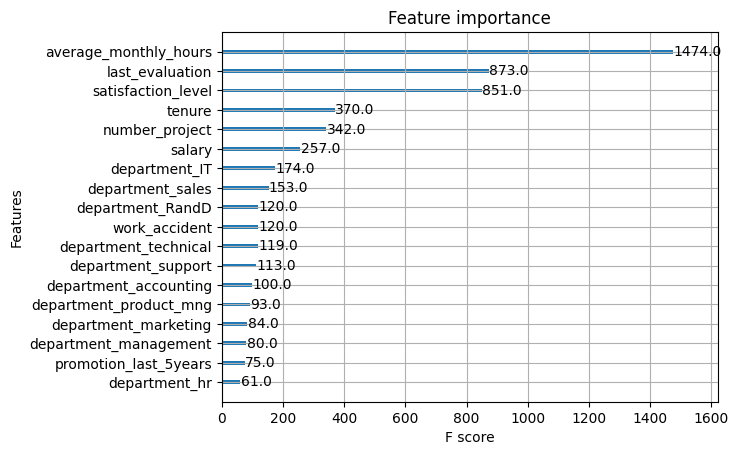

In [101]:
plot_importance(xgb_trained)

For XGBoost model the most important features are `average_monthly_hours`, `last_evaluation` and   `satisfaction_level`

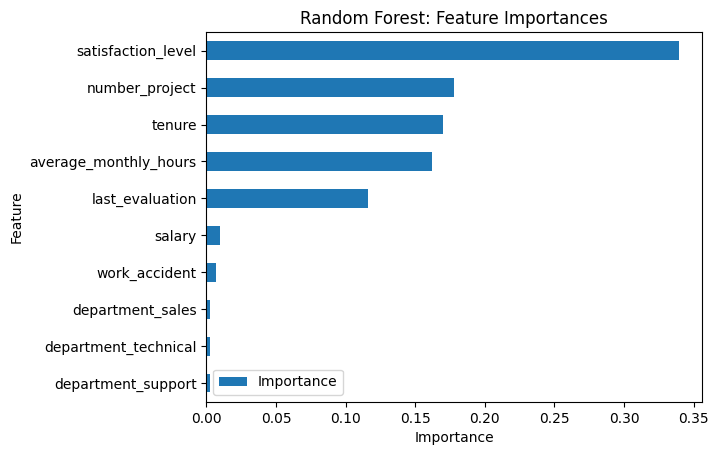

In [139]:
feat_impt = random_forest_gs.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(random_forest_gs.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
y_sort_df.plot(kind='barh',x="Feature",y="Importance")

plt.title("Random Forest: Feature Importances", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")

plt.show()

For the Random Forest model the most important features are `satisfaction_level`, `number_project`,  `tenure`, `average_monthly_hours`,  and `last_evaluation`  

## Testing champion model using holdout data.

In [140]:
y_pred = random_forest_gs.predict(X_test)

In [142]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.99      0.92      0.96       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



Tuned Random Forest model performs even better on test data. Obtained F1 score is 96%. Recall stands at 92% meaning model accurately predicted 92% of all user who in fact left.
Precision stands at 99%, which means 99% of users who were predicted to leave acctualy left.   

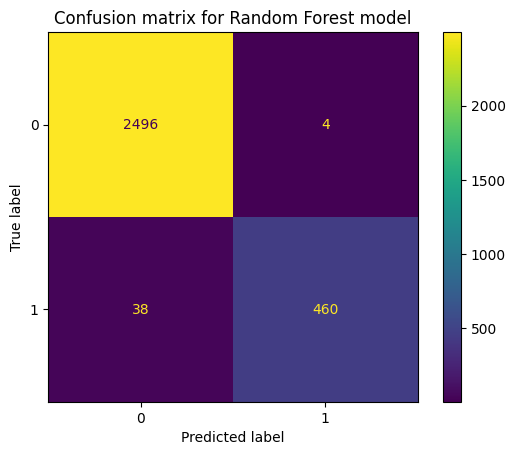

(2998,)

In [146]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=random_forest_gs.best_estimator_.classes_)
disp.plot()
plt.title('Confusion matrix for Random Forest model')
plt.show()
y_test.shape

For 2998 values in test data, 2956 were predicted correctly.
There were 4 false positives and 38 false negatives.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?



* Most predictive features are `satisfaction_level`, `number_project`,  `tenure`, `average_monthly_hours`,  and `last_evaluation`  

* `Satisfaction_level` turned out to be the most predictive feature, if not yet implemented it makes sense to implement a polling system for satisfaction.
* Despite what was concluded in the insights after an EDA, `salary` feature is not among the top predictor features.
* Paying more attention to people who work than mean value of 200hr/month, should be considered as among them are top performers, who are extremely unsatisfied.
* Model performance on the test data showed the F1 score of 95.6%, precision score of 99.1%, recall of 92.4% and an AUC score of 96.1%. Overall model accuracy of 98.6%. Wheter the model can be improved can bedetermined after new data is provided for the model, and model efficiency re-evaluated.

## Step 4. Results and Evaluation
- Prepare results, visualizations, and actionable steps to share with stakeholders




### EDA insights

* Employees within low salary category are most likely to quit.
* Majority of turnovers are from employees who stated to had satisfation of 0.5 or less.
* Most people who leave the company are either performing below average(0.71), or better then average.
* Turnover rate increases from 3rd year to 5th. People who stayed within company for 7 and more years are unlikely to quit.
There is an extreme turnover rate jump between 2nd and 3rd year.
* Employees who recived a promotion in the span of last 5 years are 4 times less likely to leave the company.
* Employees from marketing department are least likely to leave. On the other side people who work in HR department are most likely to.
* Employees who experienced a work accident are 3 times less likely to leave.
* Optimal amount of project per employee is in the range 3-4 projects.
* Whether employee leaves has negative correlation with satisfaction.

Employees who leave on their own, tend to do so because of poor managment, their work is unrewarded and there are no salary raises for around 5 years, promotions among people who work the most is extremely uncommon in given dataset.

### Model evaluation

* Most predictive features are `satisfaction_level`, `number_project`,  `tenure`, `average_monthly_hours`,  and `last_evaluation`  

* `Satisfaction_level` turned out to be the most predictive feature.

* Model performance on the test data shown the F1 score of 95.6%, precision score of 99.1%, recall of 92.4% and an AUC score of 96.1%. Overall model accuracy of 98.6%. Wheter the model can be improved can bedetermined after new data is provided for the model, and model efficiency re-evaluated.




### Conclusion, Recommendations, Next Steps


* Paying more attention to people who work than mean value of 200hr/month, should be considered as among them are top performers, who are extremely unsatisfied.
The models and the feature importances extracted from the models confirm that employees at the company are overworked. 


To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work values in the range of 4-5 can be used for the project cap.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* `Satisfaction_level` is the most predictive feature, implement a polling system for satisfaction.

**Next Steps**

Understand how often evaluation is performed and whether they are key detrimental factor in case of company considering firing an employee. If so it might make sense to build prediction model for evaluation scores as weel. If more data is given about work conditions, demographics, office locations, healthcare options. It's possible to try and build predictive model for the `satisfaction_score`.

